# BUDS Report 07: Intro to Visualizations

### Table of Contents

1. <a href='#section 1'>Numerical vs. Categorical Data</a>
2. <a href='#section 2'>Scatter Plots</a>
3. <a href='#section 3'>Histograms</a>
4. <a href='#section 4'>Bar Charts</a>

In [1]:
# run this cell
from datascience import *
import numpy as np
import math
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

## 1. Numerical vs. Categorical Data <a id='section 1'></a>

When working with data, it's important to consider whether it is numerical or categorical. This will help you create visualizations and make better analyses regarding the data.

We work with two types — numerical data and categorical data. It may sound pretty straightforward, but here are the definitions.

- **Numerical Data:** values that are from an ordered number scale where the _differences_ are meaningful

- **Categorical Data:** values are from a specific inventory that may or may not have an ordering

Run the following cell to load the `ces_data` table from the past few days. It'll be loaded into your notebook in the same way as previous notebooks but with a little more data cleaning than before. Again, the data cleaning consists of getting rid of `nan` values (datapoint attributes that couldn't be collected). You don't have to understand how the code works, but do take note of the change in the number of rows. Answer the following questions about numerical and categorical data.

In [2]:
ces_data = Table.read_table("ces_data_v2.csv")
print("The original CalEnviroScreen data had " + str(ces_data.num_rows) + " rows.")

# this does a bit of data cleaning
# don't worry about understanding these next few lines of code
for i in np.arange(ces_data.num_columns):
    if i != 3 and i != 11:
        ces_data = ces_data.where(i, are.above_or_equal_to(0))
print("The cleaned CalEnviroScreen data now has " + str(ces_data.num_rows) + " rows.")
ces_data

The original CalEnviroScreen data had 8024 rows.
The cleaned CalEnviroScreen data now has 7711 rows.


Census.Tract,CES.3.0.Score,Total.Population,California.County,Hispanic....,White....,African.American....,Native.American....,Asian.American....,Other....,ZIP,Longitude,Latitude,Ozone,PM2.5,Diesel.PM,Drinking.Water,Pesticides,Tox..Release,Traffic,Cleanup.Sites,Groundwater.Threats,Haz..Waste,Imp..Water.Bodies,Solid.Waste,Pollution.Burden,Asthma,Low.Birth.Weight,Poverty,Unemployment
6019001100,94.09,3174,Fresno,65.3,4.2,24.6,0.5,3.5,1.8,93706,-119.782,36.7097,0.065,15.4,48.524,681.2,2.75,18552,909.14,80.5,45.75,0.795,0,21.75,79.96,131.64,7.44,76.3,17.6
6071001600,90.68,6133,San Bernardino,91.1,5.8,0.7,0.3,1.4,0.7,91761,-117.618,34.0578,0.062,13.31,38.556,904.66,1.37,7494.24,782.26,66.2,36,1.25,5,12,81.19,60.66,7.04,72.5,12.3
6019000200,85.97,3167,Fresno,63.6,5.3,18.9,0.6,9.8,1.8,93706,-119.806,36.7355,0.062,15.4,47.445,681.2,3.03,12454.9,576.52,22,30.25,0.2,0,2.5,71.16,142.12,10.16,86.8,16.1
6077000801,82.49,6692,San Joaquin,57.4,6,12.5,0.3,20.9,2.8,95203,-121.315,37.9405,0.046,12.54,24.117,278.76,12.93,2387.78,1305.01,50.1,132.1,0.795,19,27,74.48,142.17,6.23,61.3,19.6
6019001500,82.03,2206,Fresno,71.8,21.4,1.2,0.5,4.5,0.6,93725,-119.718,36.6816,0.065,15.4,18.846,1000.24,3518.41,21790.7,435.16,60,54.2,13.1,0,50.8,80.2,90.48,4.5,66.4,18.6
6037204920,80.73,2598,Los Angeles,98.1,1.2,0.1,0.1,0.2,0.3,90023,-118.197,34.0175,0.046,12.89,56.52,714.48,0,39040.2,2943.44,36.7,25,4.93,7,3.85,76.73,68.74,7.35,66.4,11.6
6077000300,80.18,2396,San Joaquin,51.8,16.4,16.4,1.3,9.9,4.1,95203,-121.302,37.9524,0.046,13.44,21.76,278.76,172.49,707.536,885.52,89.7,149.05,0.135,14,2.3,68.27,169.56,8.36,76.2,14.4
6019001000,80.13,4106,Fresno,52.7,2.7,28.7,0.4,14.3,1.2,93706,-119.804,36.6978,0.065,15.4,20.848,788.02,1435.93,6996.96,243.54,15.45,20,0,0,10,66.88,142.28,7.83,74.5,20
6037206050,79.03,2146,Los Angeles,79.3,8.9,4.1,0.1,7.2,0.5,90023,-118.224,34.0299,0.046,12.89,53.958,664.07,0,10378.2,2810.82,36.05,16.25,10.025,7,22.1,77.09,58.03,6.71,75.7,28.5
6019000400,78.53,6343,Fresno,78,9.1,5.8,0.8,5.3,0.9,93721,-119.776,36.7277,0.065,15.4,54.356,681.2,114.96,125384,815.36,15.95,13.5,0.755,0,0.5,73.89,107.8,4.79,83.4,23.5


Does the column "California.County" contain numerical or categorical data?

_Written Answer:_

Does the column "ZIP" contain numerical or categorical data?

_Written Answer:_

Does the column "Asthma" contain numerical or categorical data?

_Written Answer:_

You can see that looking at whether or not the data is a number is not sufficient enough to determine whether the data is numerical. Many times, categorical data can be represented with numbers in the way that the column "Census.Tract" does. Although census tracts are shown to be numbers, they represent a community or region.

## 2. Scatter Plots <a id='section 2'></a>
    
A scatter plot is a visualization that is pretty easy to recognize. Each datapoint (or row in our table) gets its own point and is placed on a graph where the x-axis and y-axis denote different numerical attributes. It requires the use of method call `tbl.scatter(x_axis_colummn, y_axis_column)`.

As denoted earlier, the CalEnviroScreen dataset has thousands of rows. If we choose to visualize all of our data, it might be hard to see the individual points. In fact, making a visualization with this many points will make it hard for this notebook to run. To prevent these issues from occurring, select a single county to work with. Recall from a previous notebook that counties made of two words (like "Los Angeles") are written normally, but counties made of one word (like "Alameda ") have a space at the end.

**Assign the string of this county to `your_county` and take note that we are now using a table called `your_data`.**

In [ ]:
your_county = ...

your_data = ces_data.where("California.County", your_county)
your_data

In [3]:
# SOLUTION
your_county = "Alameda "

your_data = ces_data.where("California.County", your_county)
your_data

Census.Tract,CES.3.0.Score,Total.Population,California.County,Hispanic....,White....,African.American....,Native.American....,Asian.American....,Other....,ZIP,Longitude,Latitude,Ozone,PM2.5,Diesel.PM,Drinking.Water,Pesticides,Tox..Release,Traffic,Cleanup.Sites,Groundwater.Threats,Haz..Waste,Imp..Water.Bodies,Solid.Waste,Pollution.Burden,Asthma,Low.Birth.Weight,Poverty,Unemployment
6001409000,61.56,3552,Alameda,48.8,1.7,43.3,0.1,4.3,1.8,94621,-122.221,37.72,0.03,8.69794,38.28,70.6,0,596.168,1419.88,63.15,118.5,2.7,15,11.45,57.41,147.84,6.15,52.5,13.3
6001409100,59.87,2255,Alameda,51.8,1.6,41,0.1,3.7,1.8,94603,-122.183,37.7323,0.03,8.69794,37.55,70.6,0,611.929,2145.76,45.7,25.1,0.335,11,6,54.14,189.95,8.03,55.8,12.6
6001408800,59.65,5547,Alameda,45.9,2.1,41.4,0.2,7.8,2.7,94621,-122.197,37.7588,0.03,8.69794,38.315,70.6,0,548.092,411.44,46.05,37.65,0.81,15,14,50.36,161.73,8.75,66.5,20.1
6001409200,55.29,3152,Alameda,49.5,1.7,40.1,0.4,6.4,1.9,94603,-122.178,37.7291,0.03,8.69794,31.079,70.6,0,665.694,4291.67,57.6,28,0.545,11,5,54.96,106.59,8.38,44.4,13.4
6001407300,52.54,2598,Alameda,63.1,13.2,12.7,0.1,9.2,1.8,94601,-122.211,37.7622,0.03,8.69794,38.354,70.6,0,364.463,1406.6,79.45,183.05,0.86,16,30.5,56.83,99.49,5.92,56.3,9.6
6001409500,51.44,3122,Alameda,67.8,2.3,24.4,0.4,3.6,1.6,94621,-122.184,37.7504,0.03,8.69794,35.085,70.6,0,532.088,346.51,25.85,40.85,3.56,1,12.5,44.37,161.73,7.93,64.2,17.3
6001406000,50.28,3450,Alameda,21.3,16.7,12.1,0.3,46.8,2.8,94606,-122.246,37.7876,0.03,8.69794,44.58,70.6,0,324.062,1732.58,67,144.8,3.15,17,0.45,52.3,93.8,5.92,61.9,10.8
6001402200,49.46,2385,Alameda,30.2,16.3,36.4,0.3,11.4,5.4,94607,-122.296,37.8064,0.03,8.69794,76.11,70.6,0,325.564,769.38,174.3,137.25,2.875,10,11.75,54.2,165.52,6.27,56.8,13.8
6001409400,49.22,4306,Alameda,67.1,2.3,23.4,0.1,5.7,1.4,94603,-122.18,37.7446,0.03,8.69794,31.21,70.6,0,478.601,318.86,37.35,56.05,3.295,1,12.5,44.35,160.69,5.71,65.7,15.1
6001408900,47.97,3414,Alameda,59.4,2,31.9,0.4,4.2,2.1,94621,-122.189,37.7542,0.03,8.69794,38.045,70.6,0,796.602,469.47,37,31.3,2.075,1,7,45.36,161.73,4.64,73.5,17.7


Recall that [Report 06](https://highschool.datahub.berkeley.edu/hub/user-redirect/git-pull?repo=https%3A%2F%2Fgithub.com%2Fds-modules%2FBUDS-SU23&urlpath=tree%2FBUDS-SU23%2FWeek-2%2F6_Creating-Tables.ipynb&branch=main) looked at the poverty rate in California. Let's continue to look at this aspect of California tracts.

<div class="alert alert-warning">
    <b>PRACTICE:</b> In the following cell, create a scatter plot with poverty on the <i>x</i>-axis and pollution burden on the <i>y</i>-axis.
    </div>

In [ ]:
...

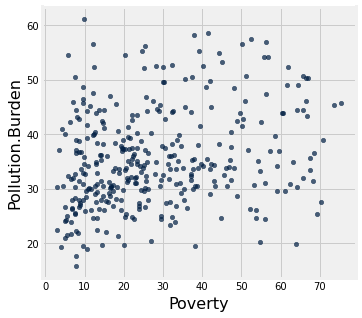

In [4]:
# SOLUTION
your_data.scatter("Poverty", "Pollution.Burden")

It seems like there might be a slight upward trend, so let's consider what the pollution burden refers to. Refer back to your reference sheet and talk about why you might see this upward trend in the scatter plot. Feel free to look back at the [CalEnviroScreen reference sheet](https://drive.google.com/file/d/1i8Jr_y_Q49Kkf2fTzcwYXh-uYUIjiHlJ/view) or the [official CalEnviroScreen report](https://oehha.ca.gov/media/downloads/calenviroscreen/report/calenviroscreen40reportf2021.pdf/).

_Written Answer:_

<div class="alert alert-warning">
    <b>PRACTICE:</b> Many other indicators are considered when the CalEnviroScreen data was collected. Let's look at whether there is an association between health indicators and poverty. In the next cell, create two separate scatter plots looking at the two health indicators included in the dataset. Place them on the <i>y</i>-axis.
    </div>

In [ ]:
...

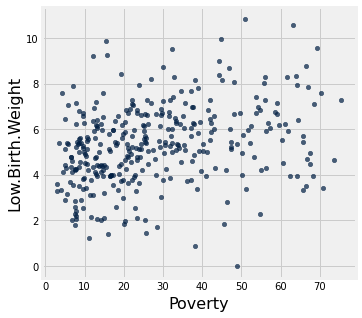

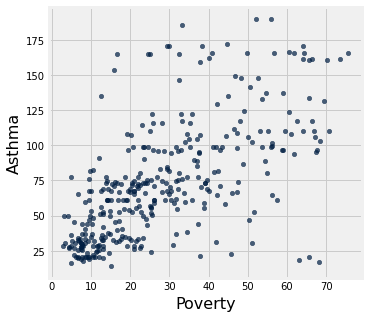

In [5]:
# SOLUTION
your_data.scatter("Poverty", "Low.Birth.Weight")
your_data.scatter("Poverty", "Asthma")

We see a similar trend as the previous scatter plot. Again, think about reasons we might see a correlation between these attributes. List a few that you think of. It might be helpful to consider how these characteristics were measured.

_Written Answer:_

<div class="alert alert-warning">
    <b>PRACTICE:</b> Finally, create a scatter plot with poverty on the <i>x</i>-axis and the CalEnviroScreen Score on the <i>y</i>-axis. 
    </div>

In [ ]:
...

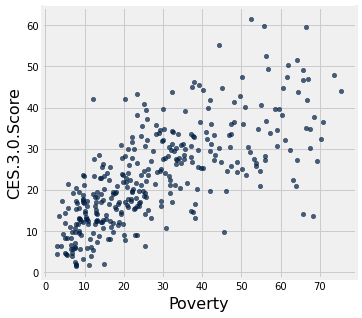

In [11]:
# SOLUTION
your_data.scatter("Poverty", "CES.3.0.Score")

There seems to be a stronger/clearer relationship between the CalEnviroScreen score and poverty than the other three relationships we viewed. Why might we see this? Consider what the CalEnviroScreen score is composed of.

_Written Answer:_

### Reading Documentation

Although looking at these scatter plots provide insight into the county you chose, it may be helpful to compare scatter plots of multiple different counties. Again, you can't do this with the whole dataset, but you can consider a smaller subset of counties.

Create and assign an array containing two different California counties to the variable `more_counties`. For reference, we have printed all California counties in the following cell.

**Make sure you take note of whether there is a space after the county name or not.**

In [12]:
# just run this cell; you don't need to understand the code
ces_data.group("California.County").column(0)

array(['Alameda ', 'Amador ', 'Butte ', 'Calaveras ', 'Colusa ',
       'Contra Costa', 'Del Norte', 'El Dorado', 'Fresno ', 'Glenn ',
       'Humboldt ', 'Imperial ', 'Inyo ', 'Kern ', 'Kings ', 'Lake ',
       'Lassen ', 'Los Angeles', 'Madera ', 'Marin ', 'Mariposa ',
       'Mendocino ', 'Merced ', 'Mono ', 'Monterey ', 'Napa ', 'Nevada ',
       'Orange ', 'Placer ', 'Plumas ', 'Riverside ', 'Sacramento ',
       'San Benito', 'San Bernardino', 'San Diego', 'San Francisco',
       'San Joaquin', 'San Luis Obispo', 'San Mateo', 'Santa Barbara',
       'Santa Clara', 'Santa Cruz', 'Shasta ', 'Sierra ', 'Siskiyou ',
       'Solano ', 'Sonoma ', 'Stanislaus ', 'Sutter ', 'Tehama ',
       'Trinity ', 'Tulare ', 'Tuolumne ', 'Ventura ', 'Yolo ', 'Yuba '],
      dtype='<U15')

In [ ]:
more_counties = ...

more_data = ces_data.where("California.County", are.contained_in(more_counties))
more_data

In [13]:
# SOLUTION
more_counties = make_array("Alameda ", "Kern ")

more_data = ces_data.where("California.County", are.contained_in(more_counties))
more_data

Census.Tract,CES.3.0.Score,Total.Population,California.County,Hispanic....,White....,African.American....,Native.American....,Asian.American....,Other....,ZIP,Longitude,Latitude,Ozone,PM2.5,Diesel.PM,Drinking.Water,Pesticides,Tox..Release,Traffic,Cleanup.Sites,Groundwater.Threats,Haz..Waste,Imp..Water.Bodies,Solid.Waste,Pollution.Burden,Asthma,Low.Birth.Weight,Poverty,Unemployment
6029002500,78.41,9122,Kern,76.7,5.1,15.9,0.7,0.4,1.2,93307,-118.992,35.3373,0.065,19.18,20.42,1041.62,3.47,49.7082,675.16,42.4,46.25,10.26,0,13.6,70.64,89.83,6.28,73.8,28.5
6029002200,69.89,6537,Kern,75.8,3.3,19.2,0.3,0.3,1,93307,-118.988,35.3613,0.065,19.6,25.57,593.77,0,38.4617,583.48,15.2,16,7.245,0,5.2,58.57,89.83,8.2,80.6,35.4
6029002301,69.08,9743,Kern,85,9.4,3.4,0.5,0.9,0.9,93307,-118.945,35.359,0.065,19.6,25.148,801.86,1.42,22.9208,509.04,14.75,8.7,0.975,0,6.5,62.04,86.67,6.29,76.3,21.8
6029002100,66,3852,Kern,83.4,4.8,9.7,1,0.3,0.9,93307,-118.999,35.3604,0.065,19.18,25.57,593.77,0,45.7549,719.8,13.4,12.5,0.9,0,1.5,55.84,89.83,7.65,71.6,22.2
6029002400,65.67,7478,Kern,70.8,18.4,5.3,0.6,3.1,1.8,93307,-118.949,35.3239,0.065,19.6,8.677,1217.18,314.73,173.791,537.47,3.15,29.3,1.71,0,10.25,64.75,89.83,4.55,62.8,17.5
6029002302,64.38,3378,Kern,94,3,1.8,0.4,0.5,0.4,93307,-118.975,35.3597,0.065,19.6,25.646,593.77,0,31.9451,619.55,14.75,7.5,4.51,0,3.25,56.38,89.83,5.86,72,22.3
6001409000,61.56,3552,Alameda,48.8,1.7,43.3,0.1,4.3,1.8,94621,-122.221,37.72,0.03,8.69794,38.28,70.6,0,596.168,1419.88,63.15,118.5,2.7,15,11.45,57.41,147.84,6.15,52.5,13.3
6001409100,59.87,2255,Alameda,51.8,1.6,41,0.1,3.7,1.8,94603,-122.183,37.7323,0.03,8.69794,37.55,70.6,0,611.929,2145.76,45.7,25.1,0.335,11,6,54.14,189.95,8.03,55.8,12.6
6029002000,59.77,7111,Kern,57.5,9.3,28.3,0.6,2.4,1.8,93304,-119.011,35.3604,0.065,18.76,31.687,593.77,0,55.6295,662.76,13.8,10,0.3,0,3,56.67,107.68,6.45,74.9,10.2
6001408800,59.65,5547,Alameda,45.9,2.1,41.4,0.2,7.8,2.7,94621,-122.197,37.7588,0.03,8.69794,38.315,70.6,0,548.092,411.44,46.05,37.65,0.81,15,14,50.36,161.73,8.75,66.5,20.1


Great! Now you have a dataset with your selected counties. In order to create a scatter plot that effectively compares multiple counties, you need to add a few arguments to your call expression. You need to do this because this scatter plot is not like the previous scatter plots. 

Instead of having you copy and paste code, let's practice reading documentation! Recall that **documentation** is a description that explains the arguments that a function/method takes and what it does.

JupyterNotebook offers a helpful tool in quickly attaining documentation of a command. Here's how you can do it:

- Click on the function/method that you are calling.
- Press **`Shift + Tab`** at the same time.
    - At this point, a little pop-up menu should show up.
- Select the caret symbol `^` to get a full screen view of the documentation.
    - Otherwise you can select the plus sign `+` for a minimized documentation window.
    

<div class="alert alert-warning">
    <b>PRACTICE:</b> Try doing this with <code>np.arange</code> in the cell below. Be sure to click on the <code>arange</code> portion, as that is the function that we want to call. NumPy (denoted <code>np</code>) is the library that houses the function <code>arange</code>. In the following Markdown cell, explain what you see in the documentation.
    </div>

In [ ]:
np.arange(0, 10, 2)

_Written Answer:_

<div class="alert alert-warning">
    <b>PRACTICE:</b> Repeat this process with the <code>scatter</code> method. A number of phrases (like "Signature" and "Docstring") might show up. Take note of the similarities between the documentation of <code>arange</code> and the documentation of <code>scatter</code>. What do you think is being described in the documentation of <code>scatter</code>? You don't need to understand all items in the documentation, but try skimming all parts.
    </div>
    
Once you have done this, talk to your team and facilitators about your guesses.

In [ ]:
more_data.scatter(...)

_Written Answer:_

<div class="alert alert-warning">
    <b>PRACTICE:</b> Now that you have an idea of how <code>scatter</code> works and what each of its arguments are, create a scatter plot of your two counties' poverty-CalEnviroScreen score relationships. Keep "Poverty" on the <i>x</i>-axis and "CES.3.0.Score" on the <i>y</i>-axis. Try adjusting the different arguments so that your visualization is easier to interpret. For example, you might want to alter the size of the points if you have a county with many tracts.
    </div>

In [ ]:
more_data.scatter(...)

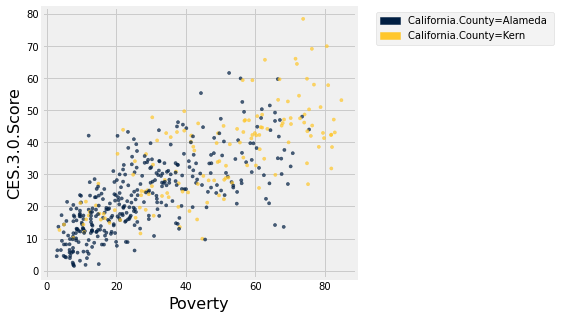

In [14]:
# SOLUTION
more_data.scatter("Poverty", "CES.3.0.Score", group="California.County", s=10)

Compare and contrast the two counties you just made a visualization of. Are there similarities in their trends? What differences do you see (if any stand out)?

_Written Answer:_

## 3. Histograms <a id='section 3'></a>

Another type of visualization that you may have seen before is a histogram. Because it displays the distribution of a quantitative variable, it is very useful for numerical data. In the context of a histogram, a **distribution** will show how frequently numbers from a number range appear.

Run the following cell to see the distribution of CalEnviroScreen scores. Call expressions that make histograms will always follow this format: `tbl.hist(x_axis_column, normed=False)`.

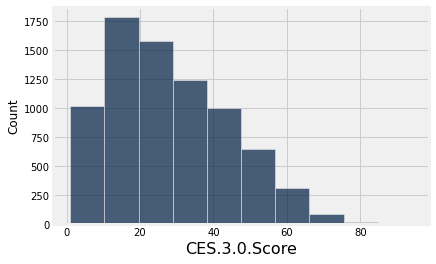

In [15]:
ces_data.hist("CES.3.0.Score", normed=False)

What do you notice about the shape of this histogram? Is it nice and even? Does it pull off into one direction?

_Written Answer:_

<div class="alert alert-warning">
    <b>PRACTICE:</b> Let's once again take a look at either poverty or unemployment to create a visualization. (Choose which one you'd like to look at.) Make sure to use <code>ces_data</code> and the <code>normed=False</code> argument. How does this histogram's shape and spread compare to the histogram of CES scores?
    </div>

In [ ]:
...

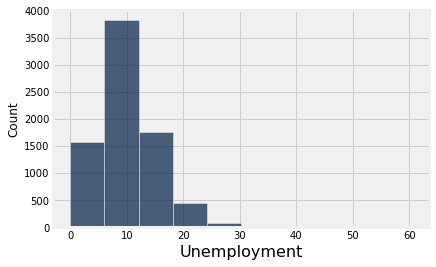

In [16]:
# SOLUTION
ces_data.hist("Unemployment", normed=False)

_Written Answer:_

We're able to use the entire dataset with histograms because it requires less computation to generate histograms than it does scatter plots. Still, it might be useful to look at a subset of our data again. Let's stick to using the tables you created earlier. Recall that you have one county in the `your_data` table and multiple counties in the `more_data` table.

In [17]:
# run this cell
print("The county in your_data is: ")
print(" - " + your_county)

print("The counties in more_data are: ")
for county in more_counties:
    print(" - " + county)

The county in your_data is: 
 - Alameda 
The counties in more_data are: 
 - Alameda 
 - Kern 


<div class="alert alert-warning">
    <b>PRACTICE:</b> Create the same histogram you made in the last "PRACTICE" question. This time, make it with <code>your_data</code> and see how its distribution compares to the rest of California. Note the differences and similarities. Draw on what you know about this county and explain why this might be.
    </div>

In [ ]:
...

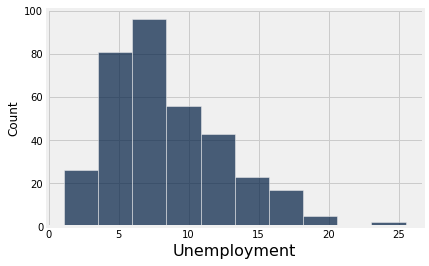

In [18]:
# SOLUTION
your_data.hist("Unemployment", normed=False)

_Written Answer:_

<div class="alert alert-warning">
    <b>PRACTICE:</b> Try making a histogram that displays multiple different counties. Keep the same column on the <i>x</i>-axis as the previous two histograms and read the documentation of <code>hist</code> in the same way you read the documentation of <code>scatter</code>. Again, try adjusting the different arguments so that your visualization is easier to interpret.
    
Please be sure to keep the <code>normed=False</code> argument!
    </div>

As usual, discuss any arguments that are confusing or not quite intuitive with your team and your facilitators.

Also ignore any red warning signs if your visualization successfully appears. The message will not break your computer or cause any issues; it's simply indicating that something is out-of-date. Don't worry about this.

In [ ]:
more_data.hist(...)

/opt/conda/lib/python3.9/site-packages/datascience/tables.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array(tuple(values))


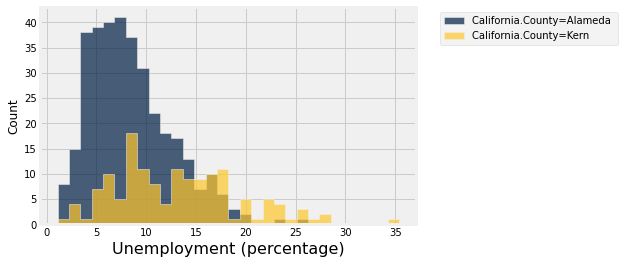

In [19]:
# SOLUTION
more_data.hist("Unemployment", bins=30, unit="percentage", group="California.County", normed=False)

<div class="alert alert-warning">
    <b>PRACTICE:</b> You might find that the shapes of these distributions are drastically different. Let's try a <i>new</i> subset of counties. Choose two <i>new</i> counties that you think might have similar population sizes and characteristics.


If your above distributions are already pretty similar, choose two counties that you think are pretty different.

    
Then, make the same histogram as above using these <i>new</i> counties.
    </div>

In [ ]:
diff_counties = ...

diff_data = ces_data.where("California.County", are.contained_in(diff_counties))
diff_data

In [20]:
# SOLUTION
diff_counties = make_array("Alameda ", "Contra Costa")

diff_data = ces_data.where("California.County", are.contained_in(diff_counties))
diff_data

Census.Tract,CES.3.0.Score,Total.Population,California.County,Hispanic....,White....,African.American....,Native.American....,Asian.American....,Other....,ZIP,Longitude,Latitude,Ozone,PM2.5,Diesel.PM,Drinking.Water,Pesticides,Tox..Release,Traffic,Cleanup.Sites,Groundwater.Threats,Haz..Waste,Imp..Water.Bodies,Solid.Waste,Pollution.Burden,Asthma,Low.Birth.Weight,Poverty,Unemployment
6001409000,61.56,3552,Alameda,48.8,1.7,43.3,0.1,4.3,1.8,94621,-122.221,37.72,0.03,8.69794,38.28,70.6,0,596.168,1419.88,63.15,118.5,2.7,15,11.45,57.41,147.84,6.15,52.5,13.3
6001409100,59.87,2255,Alameda,51.8,1.6,41,0.1,3.7,1.8,94603,-122.183,37.7323,0.03,8.69794,37.55,70.6,0,611.929,2145.76,45.7,25.1,0.335,11,6,54.14,189.95,8.03,55.8,12.6
6001408800,59.65,5547,Alameda,45.9,2.1,41.4,0.2,7.8,2.7,94621,-122.197,37.7588,0.03,8.69794,38.315,70.6,0,548.092,411.44,46.05,37.65,0.81,15,14,50.36,161.73,8.75,66.5,20.1
6013379000,57.04,6117,Contra Costa,52.8,2.3,40.2,0.3,2.5,1.9,94804,-122.357,37.9283,0.03,8.69794,47.223,70.6,0,1337.78,424.6,78.1,67,2.195,10,10,52.08,160.81,7.74,50.9,16.4
6013312000,56.88,2292,Contra Costa,38.3,10.5,39,0.4,8.5,3.2,94565,-121.87,38.0152,0.038,7.85958,19.782,136.89,0,1099.02,1192.72,26.5,38.3,4.575,12,7.45,53.23,150.18,6.09,61,16.4
6001409200,55.29,3152,Alameda,49.5,1.7,40.1,0.4,6.4,1.9,94603,-122.178,37.7291,0.03,8.69794,31.079,70.6,0,665.694,4291.67,57.6,28,0.545,11,5,54.96,106.59,8.38,44.4,13.4
6013365002,54,5462,Contra Costa,54,3.1,30.9,0.2,8.7,3.1,94801,-122.384,37.9595,0.03,7.85958,29.382,70.6,0.22,952.454,302.07,110.4,45.25,14.6,12,18.2,52.1,195.32,5.19,60.1,16
6013377000,53.63,6962,Contra Costa,63.1,7,23,0.2,4.8,1.9,94801,-122.363,37.9338,0.03,8.27876,45.335,70.6,0,1618,231.8,57.2,42.45,3.58,11,5.5,48.76,201.52,6.7,56.9,14.4
6001407300,52.54,2598,Alameda,63.1,13.2,12.7,0.1,9.2,1.8,94601,-122.211,37.7622,0.03,8.69794,38.354,70.6,0,364.463,1406.6,79.45,183.05,0.86,16,30.5,56.83,99.49,5.92,56.3,9.6
6001409500,51.44,3122,Alameda,67.8,2.3,24.4,0.4,3.6,1.6,94621,-122.184,37.7504,0.03,8.69794,35.085,70.6,0,532.088,346.51,25.85,40.85,3.56,1,12.5,44.37,161.73,7.93,64.2,17.3


In [ ]:
...

/opt/conda/lib/python3.9/site-packages/datascience/tables.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array(tuple(values))


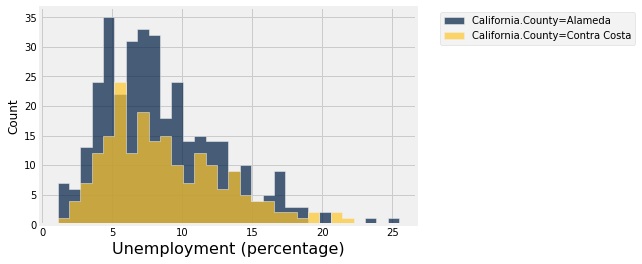

In [21]:
# SOLUTION
diff_data.hist("Unemployment", bins=30, unit="percentage", group="California.County", normed=False)

Do you find that the histograms with similar counties are easier to interpret than the histograms with different counties? Do you see any issues with this visualization? For example, what might be an issue when comparing counties with very different population sizes?

_Written Answer:_

Not all of the histograms look as nice as the CalEnviroScreen score histogram because some of our data is distributed differently. For example, take a look at the pesticides distribution. Even if you make changes to its arguments, the visualization is hard to use.

/opt/conda/lib/python3.9/site-packages/datascience/tables.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array(tuple(values))


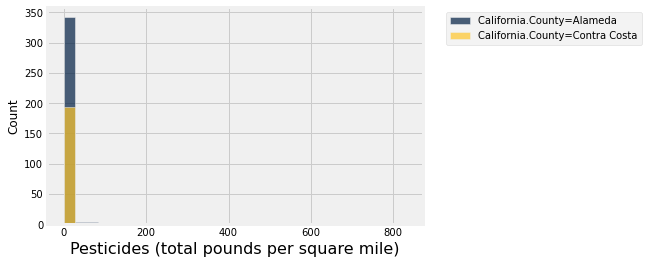

In [22]:
diff_data.hist("Pesticides", bins=30, unit="total pounds per square mile", group="California.County", normed=False)

## 4. Bar Charts <a id='section 4'></a>

It's a little hard to work with the current `ces_data` table because there are so many census tracts. Let's try looking at unique counties instead of unique census tracts. To do so, we need to think about how we want to represent our information. For example, is it better to take the *sum* of the SF county census tracts' populations or the *average* of the SF county census tracts' populations? Should we take the *sum* of unemployment percentages or the *average* of unemployment percentages?

<div class="alert alert-warning">
    <b>PRACTICE:</b> Assign <code>sum_attributes</code> to a new array containing "California.County" and the name of the column we would want to take sums of. You don't need to know how the following line of code works, but you can read it and see if you have an idea of what happens in that line.
    </div>

In [ ]:
sum_attributes = ...

county_sums = ces_data.select(sum_attributes).group("California.County", sum)
county_sums

In [23]:
# SOLUTION
sum_attributes = make_array("California.County", "Total.Population")

county_sums = ces_data.select(sum_attributes).group("California.County", sum)
county_sums

California.County,Total.Population sum
Alameda,1474913
Amador,38091
Butte,220000
Calaveras,44636
Colusa,21419
Contra Costa,1027163
Del Norte,10906
El Dorado,179910
Fresno,901157
Glenn,28122


<div class="alert alert-warning">
    <b>PRACTICE:</b> Now, assign <code>avg_attributes</code> to an array with "California.County", "CES.3.0.Score", and three other columns that we would want to take averages of. Again, you don't need to know how the following line works.
    </div>

In [ ]:
avg_attributes = ...

county_avgs = ces_data.select(avg_attributes).group("California.County", np.average)
county_avgs

In [24]:
# SOLUTION
avg_attributes = make_array("California.County", "CES.3.0.Score", "Ozone", "PM2.5", "Diesel.PM")

county_avgs = ces_data.select(avg_attributes).group("California.County", np.average)
county_avgs

California.County,CES.3.0.Score average,Ozone average,PM2.5 average,Diesel.PM average
Alameda,23.1082,0.032616,8.77722,33.0201
Amador,22.3833,0.0536667,6.64828,0.656222
Butte,22.0051,0.0502157,9.05137,7.85133
Calaveras,15.3656,0.0534444,6.43665,0.401333
Colusa,27.406,0.0464,7.2396,2.2946
Contra Costa,20.0772,0.036275,8.01259,14.8781
Del Norte,12.035,0.035,3.66779,0.969
El Dorado,10.2985,0.0549,6.92034,2.1097
Fresno,43.269,0.0634764,15.2094,24.4689
Glenn,23.6117,0.0476667,8.59246,4.18617


Notice what happens after we made tables with only one row per unique county. Both tables have only 56 rows (or 56 counties) and now have different column names.

Since visualizing 56 different counties might get a little messy, we'll only work with bay area counties for the remainder of the notebook. You don't need to understand the next code cell, but it might help you understand what has happened.

In the next cell, we join the `county_sums` table with the `county_avgs` table so that all the data can be accessed in one table. Then, we make an array with only Bay Area counties and keep the rows where "California.County" is a Bay Area county.

In [25]:
county_statistics = county_sums.join("California.County", county_avgs)

bay_counties = make_array("Alameda ", "Contra Costa", "Marin ", "Napa ", "San Mateo", "Santa Clara", "Solano ", "Sonoma ", "San Francisco")
bay_county_statistics = county_statistics.where("California.County", are.contained_in(bay_counties))

bay_county_statistics

California.County,Total.Population sum,CES.3.0.Score average,Ozone average,PM2.5 average,Diesel.PM average
Alameda,1474913,23.1082,0.032616,8.77722,33.0201
Contra Costa,1027163,20.0772,0.036275,8.01259,14.8781
Marin,246517,8.83736,0.0306226,7.21895,7.40162
Napa,134454,17.0926,0.0348158,7.71991,9.20958
San Francisco,793042,17.2039,0.03,8.57085,64.6639
San Mateo,709378,16.1459,0.0318506,9.02458,16.2943
Santa Clara,1773846,18.5394,0.0367302,10.1486,21.4824
Solano,397547,23.2822,0.0383626,7.89183,13.5457
Sonoma,475933,16.3741,0.0316458,6.53593,10.8022


Now that you've set up a table with the necessary information, you can go ahead and make a bar chart. Calls to create bar charts follow the following format: `tbl.barh(category_column, count_column)`.

We use `barh` instead of `bar` because horizontal bar charts tend to present better on Jupyter Notebooks.

<div class="alert alert-warning">
    <b>PRACTICE:</b> Create a (horizontal) bar chart with the bay area counties as its categories and the column you took sums of as its counts.
    </div>

In [ ]:
...

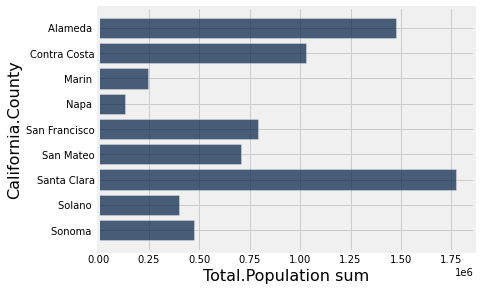

In [26]:
# SOLUTION
bay_county_statistics.barh("California.County", "Total.Population sum")

Let's sort the bars in order so that we have a better idea of the relative differences between different counties. Notice that the counties in the above bar graph are sorted in the same order as the column "California.County" in the `bay_county_statistics` table. Try to think of how we could get our bars to appear in order of lowest total population to highest.

In [ ]:
...

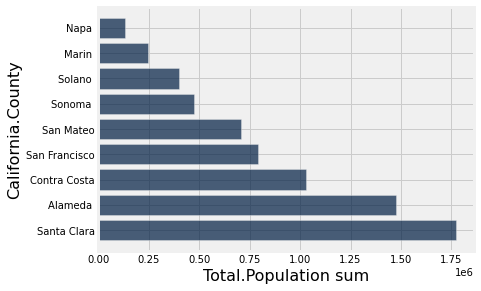

In [27]:
# SOLUTION
bay_county_statistics.sort("Total.Population sum").barh("California.County", "Total.Population sum")

### Time Permitting (Optional)

Finally, create more bar charts for the columns you took averges of. Feel free to read the documentation of `barh` in the same way you read the documentation of `scatter` and `hist`. This might make your visualizations much cleaner.

In [ ]:
...

In [ ]:
...

In [ ]:
...

### Downloading as PDF

Congratulations on finishing this lengthy report!

Download this notebook as a pdf by clicking <b><code>File > Download as > PDF via LaTeX (.pdf)</code></b>. Turn in the PDF into bCourses under the corresponding assignment.